In [28]:
import tweepy

In [29]:
from textblob import TextBlob 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import re
plt.style.use('fivethirtyeight')

In [48]:
from wordcloud import WordCloud

In [31]:
consumer_token='
consumer_secret_key='
access_token= 
access_token_secret= 

In [32]:
auth = tweepy.OAuthHandler(consumer_token,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)

In [33]:
api = tweepy.API(auth)

In [35]:
public_tweets = api.search('BillGates',count=100,lang='en')

In [42]:
i=1
for tweet in public_tweets[0:5]:
    print(str(i)+') '+tweet.text + '\n')
    i=i+1

1) RT @myheartsadancer: @Valerie24190901 Is it too late to stop the evil #billgates vaccinating 1.7 billion in Africa which started Jun 24th a…

2) RT @free_energy2016: 🚩 IT IS HAPPENING !!!
 #BillGates is actually starting #depopulation of Africa !
Oxford is funded by #BillGates ! http…

3) @Daniel_W_See @4thGenBlog @HOMOCOSMICUSv2 @NewTimesRwanda @EmNtirenganya @IPCC_CH @CEMSecretariat @OECD @IEA… https://t.co/ThjRzQtmJ6

4) RT @AOECOIN: CRIMINAL SCAM Organization #CNBC is promoting the SCAM drug #Remdesivir by #Fauci #BillGates #Gilead with a 5-8% DEATH rate &amp;…

5) RT @myheartsadancer: @Valerie24190901 Is it too late to stop the evil #billgates vaccinating 1.7 billion in Africa which started Jun 24th a…



In [38]:
df= pd.DataFrame([tweet.text for tweet in public_tweets], columns=['Tweets'])
df.head()

,Tweets
0,RT @myheartsadancer: @Valerie24190901 Is it to...
1,RT @free_energy2016: 🚩 IT IS HAPPENING !!!\n #...
2,@Daniel_W_See @4thGenBlog @HOMOCOSMICUSv2 @New...
3,RT @AOECOIN: CRIMINAL SCAM Organization #CNBC ...
4,RT @myheartsadancer: @Valerie24190901 Is it to...


In [43]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removed
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text



In [44]:
df['Tweets']=df['Tweets'].apply(cleanText)

In [45]:
df

,Tweets
0,: Is it too late to stop the evil billgates v...
1,_energy2016: 🚩 IT IS HAPPENING !!!\n BillGates...
2,_W_See _CH …
3,: CRIMINAL SCAM Organization CNBC is promoting...
4,: Is it too late to stop the evil billgates v...
...,...
95,"📣 New Podcast! ""The David Knight Show - 2020- ..."
96,: Dear :\n\nYou have long been a leader in fi...
97,I really want to buy my own apartment.
98,: ExposeBillGates BillGates’ Latest Instagram ...


In [46]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [47]:
df

,Tweets,Subjectivity,Polarity
0,: Is it too late to stop the evil billgates v...,0.800000,-0.650000
1,_energy2016: 🚩 IT IS HAPPENING !!!\n BillGates...,0.100000,0.000000
2,_W_See _CH …,0.000000,0.000000
3,: CRIMINAL SCAM Organization CNBC is promoting...,0.550000,-0.400000
4,: Is it too late to stop the evil billgates v...,0.800000,-0.650000
...,...,...,...
95,"📣 New Podcast! ""The David Knight Show - 2020- ...",0.454545,0.213068
96,: Dear :\n\nYou have long been a leader in fi...,0.650000,-0.425000
97,I really want to buy my own apartment.,0.600000,0.400000
98,: ExposeBillGates BillGates’ Latest Instagram ...,0.900000,0.500000


<function matplotlib.pyplot.show(*args, **kw)>

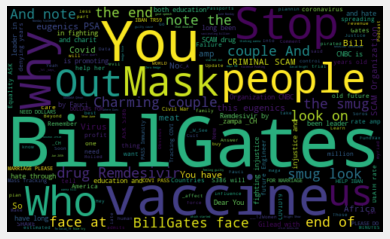

In [49]:
#Plot the word cloud
allwords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show

In [51]:
def clean1Text(text):
    text = re.sub(r'Why','',text) #removed
    text = re.sub(r'Who','',text)
   
    return text

In [52]:
df['Tweets']=df['Tweets'].apply(clean1Text)

<function matplotlib.pyplot.show(*args, **kw)>

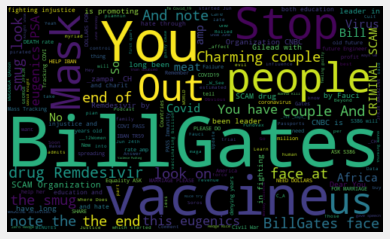

In [53]:
allwords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show

In [54]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analytics']=df['Polarity'].apply(getAnalysis)

In [55]:
df

,Tweets,Subjectivity,Polarity,Analytics
0,: Is it too late to stop the evil billgates v...,0.800000,-0.650000,Negative
1,_energy2016: 🚩 IT IS HAPPENING !!!\n BillGates...,0.100000,0.000000,Neutral
2,_W_See _CH …,0.000000,0.000000,Neutral
3,: CRIMINAL SCAM Organization CNBC is promoting...,0.550000,-0.400000,Negative
4,: Is it too late to stop the evil billgates v...,0.800000,-0.650000,Negative
...,...,...,...,...
95,"📣 New Podcast! ""The David Knight Show - 2020- ...",0.454545,0.213068,Positive
96,: Dear :\n\nYou have long been a leader in fi...,0.650000,-0.425000,Negative
97,I really want to buy my own apartment.,0.600000,0.400000,Positive
98,: ExposeBillGates BillGates’ Latest Instagram ...,0.900000,0.500000,Positive
